In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Defining Paths for files

In [2]:
the_dir_lakh = 'Cleaned Lakh'
artist_names = os.listdir(the_dir_lakh)
artist_names.remove('.DS_Store')
artist_names.remove('.gitattributes')
artist_names.remove('LICENSE')
artist_names.remove('README.md')
artist_file_paths = [os.path.join(the_dir_lakh, n) for n in artist_names]
test = artist_file_paths[0]
song_names = [os.listdir(artist_file_paths[n]) for n in range(len(artist_file_paths))]
song_file_paths = [[os.path.join(artist_file_paths[k], n) for n in song_names[k]] for k in range(len(song_names))]


# Genre Classification VIA Matching

In [3]:
#dictionary comprehension of artist names and song names
artist_song_dict = {artist_names[n]: song_names[n] for n in range(len(artist_names))}
#create a pandas dictionary with a artist column, a song name column, and a file path column
ser_song_paths = pd.Series([song for artist in song_file_paths for song in artist])
ser_song_names = pd.Series([song for artist in song_names for song in artist])
ser_artist_names = pd.Series([artist for artist in artist_names for song in artist_song_dict[artist]])
df_song_paths = pd.DataFrame({'artist': ser_artist_names, 'song_name': ser_song_names, 'song_path': ser_song_paths})
df_song_paths['song_name'] = df_song_paths['song_name'].str[:-4]

#Removing underscores and capital letters from artist names and song names
df_song_paths['artist'] = df_song_paths['artist'].str.replace('_', ' ')
df_song_paths['artist'] = df_song_paths['artist'].str.title()
df_song_paths['song_name'] = df_song_paths['song_name'].str.replace('_', ' ')
df_song_paths['song_name'] = df_song_paths['song_name'].str.title()
df_song_paths.head()


,artist,song_name,song_path
0,.38 Special,Caught Up In You,Cleaned Lakh\.38 Special\Caught Up In You.mid
1,.38 Special,Fantasy Girl,Cleaned Lakh\.38 Special\Fantasy Girl.mid
2,"10,000 Maniacs",A Campfire Song,"Cleaned Lakh\10,000_Maniacs\A_Campfire_Song.mid"
3,101 Strings,Theme From The Godfather,Cleaned Lakh\101_Strings\Theme_From_The_Godfat...
4,10Cc,Dreadlock Holiday.1,Cleaned Lakh\10cc\Dreadlock_Holiday.1.mid


In [4]:
df_matched = df_song_paths.rename(columns={'artist': 'artist_name', 'song_name': 'title', 'song_path': 'file_path'})
df_matched['songartist'] = df_matched['artist_name'] + ' - ' + df_matched['title']
df_matched.head()


,artist_name,title,file_path,songartist
0,.38 Special,Caught Up In You,Cleaned Lakh\.38 Special\Caught Up In You.mid,.38 Special - Caught Up In You
1,.38 Special,Fantasy Girl,Cleaned Lakh\.38 Special\Fantasy Girl.mid,.38 Special - Fantasy Girl
2,"10,000 Maniacs",A Campfire Song,"Cleaned Lakh\10,000_Maniacs\A_Campfire_Song.mid","10,000 Maniacs - A Campfire Song"
3,101 Strings,Theme From The Godfather,Cleaned Lakh\101_Strings\Theme_From_The_Godfat...,101 Strings - Theme From The Godfather
4,10Cc,Dreadlock Holiday.1,Cleaned Lakh\10cc\Dreadlock_Holiday.1.mid,10Cc - Dreadlock Holiday.1


In [5]:
#same
df_song_paths['song_artist'] = df_song_paths['artist'] + ' - ' + df_song_paths['song_name']
df_song_paths.head()

,artist,song_name,song_path,song_artist
0,.38 Special,Caught Up In You,Cleaned Lakh\.38 Special\Caught Up In You.mid,.38 Special - Caught Up In You
1,.38 Special,Fantasy Girl,Cleaned Lakh\.38 Special\Fantasy Girl.mid,.38 Special - Fantasy Girl
2,"10,000 Maniacs",A Campfire Song,"Cleaned Lakh\10,000_Maniacs\A_Campfire_Song.mid","10,000 Maniacs - A Campfire Song"
3,101 Strings,Theme From The Godfather,Cleaned Lakh\101_Strings\Theme_From_The_Godfat...,101 Strings - Theme From The Godfather
4,10Cc,Dreadlock Holiday.1,Cleaned Lakh\10cc\Dreadlock_Holiday.1.mid,10Cc - Dreadlock Holiday.1


<Axes: title={'center': 'Top 10 Artists in the combined dataset'}, xlabel='Artist Name', ylabel='Number of Songs'>

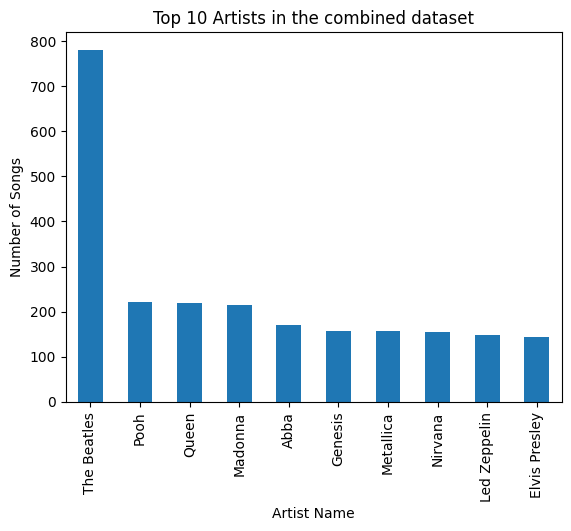

In [6]:
#hist with artist label on x axis and number of songs on y axis
df_matched['artist_name'].value_counts().head(10).plot(kind='bar',title='Top 10 Artists in the combined dataset',ylabel='Number of Songs',xlabel='Artist Name')


<Axes: title={'center': 'Number of Artists with Different Genre Songs (total dataset)'}, ylabel='Number of Artists'>

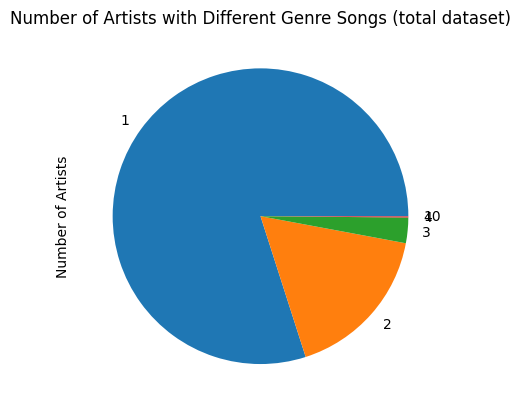

In [7]:
df_music_genre = pd.read_csv('music_genre.csv')
df_music_genre.drop(columns=['instance_id', 'duration_ms', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability', 'popularity', 'obtained_date'], inplace=True)
df_music_genre.dropna(inplace=True)
df_music_genre.reset_index(inplace=True)
df_music_genre.drop(columns=['index'], inplace=True)
df_music_genre['artist_name'] = df_music_genre['artist_name'].str.title()
df_music_genre['artist_name'] = df_music_genre['artist_name'].str.replace('_', ' ')
df_music_genre['track_name'] = df_music_genre['track_name'].str.title()
df_music_genre['track_name'] = df_music_genre['track_name'].str.replace('_', ' ')

#plot the number of artists that have different genre songs
df_music_genre.groupby('artist_name')['music_genre'].nunique()
df_music_genre.groupby('artist_name')['music_genre'].nunique().value_counts().plot(kind='pie', title='Number of Artists with Different Genre Songs (total dataset)', ylabel='Number of Artists', xlabel='Number of Genres')

In [8]:
#adding the genre column to the df_matched dataframe
#add the genre column to the df_matched dataframe where the artist name and song name match
df_matched_w_genre = df_matched[df_matched['artist_name'].isin(df_music_genre['artist_name'])]
df_matched_w_genre.reset_index(inplace=True)
df_matched_w_genre.drop(columns=['index'], inplace=True)
df_music_genre_matched = df_music_genre[df_music_genre['artist_name'].isin(df_matched['artist_name'])]
df_music_genre_matched.reset_index(inplace=True)
df_music_genre_matched.drop(columns=['index'], inplace=True)

C:\Users\hanse\AppData\Local\Temp\ipykernel_21744\1874103478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matched_w_genre.drop(columns=['index'], inplace=True)
C:\Users\hanse\AppData\Local\Temp\ipykernel_21744\1874103478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_genre_matched.drop(columns=['index'], inplace=True)


<Axes: title={'center': 'Music Genre Distribution for Artists with 2 Genres (matched dataset)'}, ylabel='Number of Songs'>

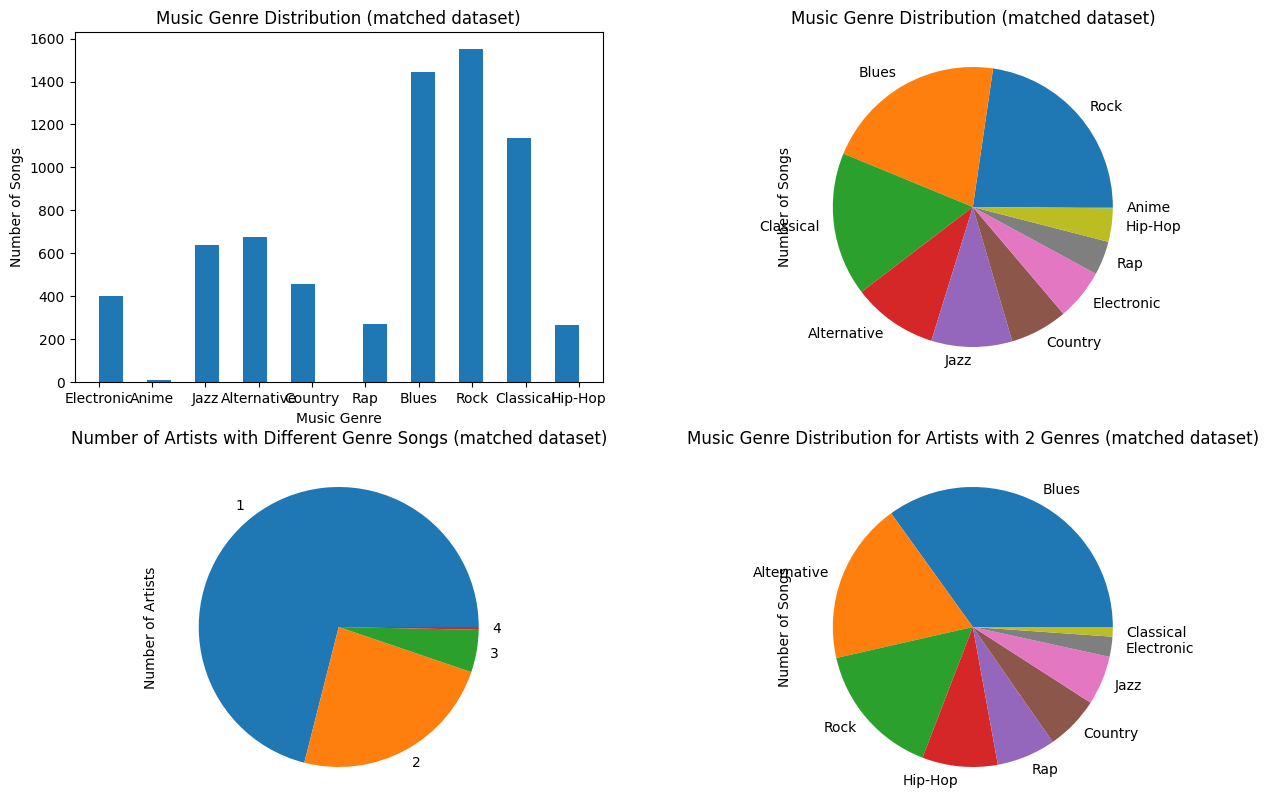

In [9]:
#create a 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].hist(df_music_genre_matched['music_genre'], bins=20)
axs[0, 0].set_title('Music Genre Distribution (matched dataset)')
axs[0, 0].set_xlabel('Music Genre')
axs[0, 0].set_ylabel('Number of Songs')
#create a pie chart of the music genre distribution in the [0,1] subplot
df_music_genre_matched['music_genre'].value_counts().plot(kind='pie', ax=axs[0, 1], title='Music Genre Distribution (matched dataset)', ylabel='Number of Songs', xlabel='Music Genre')
#plot the number of artists that have different genre songs
df_music_genre_matched.groupby('artist_name')['music_genre'].nunique().value_counts().plot(kind='pie', ax=axs[1, 0], title='Number of Artists with Different Genre Songs (matched dataset)', ylabel='Number of Artists', xlabel='Number of Genres')
#plot the genre distribution for artists that have 2 genres
df_music_genre_matched[df_music_genre_matched['artist_name'].isin(df_music_genre_matched.groupby('artist_name')['music_genre'].nunique().index[df_music_genre_matched.groupby('artist_name')['music_genre'].nunique() == 2])]['music_genre'].value_counts().plot(kind='pie', ax=axs[1, 1], title='Music Genre Distribution for Artists with 2 Genres (matched dataset)', ylabel='Number of Songs', xlabel='Music Genre')



In [10]:
#more cleaning and preprocessing
#add label to the df_music_genre_matched dataframe with the number of genres that the artist has
df_music_genre_matched['num_genres'] = df_music_genre_matched.groupby('artist_name')['music_genre'].transform('nunique')
#if the artist has 2 genres, add a column with the first genre and a column with the second genre
df_music_genre_matched['first_genre'] = df_music_genre_matched.groupby('artist_name')['music_genre'].transform('first')
df_music_genre_matched['second_genre'] = df_music_genre_matched.groupby('artist_name')['music_genre'].transform('last')
#if the artist is in the df_matched_w_genre dataframe, add the two genres column to the df_matched_w_genre dataframe from df_music_genre_matched
#merging 
df_merged = df_matched_w_genre.merge(df_music_genre_matched[['artist_name', 'num_genres', 'first_genre', 'second_genre']], on='artist_name', how='left').drop_duplicates(subset=['songartist'])

C:\Users\hanse\AppData\Local\Temp\ipykernel_21744\414110964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_genre_matched['num_genres'] = df_music_genre_matched.groupby('artist_name')['music_genre'].transform('nunique')
C:\Users\hanse\AppData\Local\Temp\ipykernel_21744\414110964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_genre_matched['first_genre'] = df_music_genre_matched.groupby('artist_name')['music_genre'].transform('first')
C:\Users\hanse\AppData\Local\Temp\ipykernel_217

In [11]:
#columns_to_drop = ['artist_familiarity','release','track_id','song_id','artist_id','artist_mbid','duration','artist_familiarity','artist_hotttnesss','track_7digitalid','shs_perf','shs_work','year']
df_merged_cut = df_merged

#FIX FILE PATH
df_merged_cut.reset_index(inplace=True)
df_merged_cut.drop(columns=['index'], inplace=True)
df_merged_cut.head()


,artist_name,title,file_path,songartist,num_genres,first_genre,second_genre
0,"10,000 Maniacs",A Campfire Song,"Cleaned Lakh\10,000_Maniacs\A_Campfire_Song.mid","10,000 Maniacs - A Campfire Song",1,Rock,Rock
1,10Cc,Dreadlock Holiday.1,Cleaned Lakh\10cc\Dreadlock_Holiday.1.mid,10Cc - Dreadlock Holiday.1,1,Rock,Rock
2,10Cc,Dreadlock Holiday.2,Cleaned Lakh\10cc\Dreadlock_Holiday.2.mid,10Cc - Dreadlock Holiday.2,1,Rock,Rock
3,10Cc,Dreadlock Holiday.3,Cleaned Lakh\10cc\Dreadlock_Holiday.3.mid,10Cc - Dreadlock Holiday.3,1,Rock,Rock
4,10Cc,Dreadlock Holiday.4,Cleaned Lakh\10cc\Dreadlock_Holiday.4.mid,10Cc - Dreadlock Holiday.4,1,Rock,Rock


52% of the songs in the Cleaned Lakh dataset were matched with the Genre Classification dataset


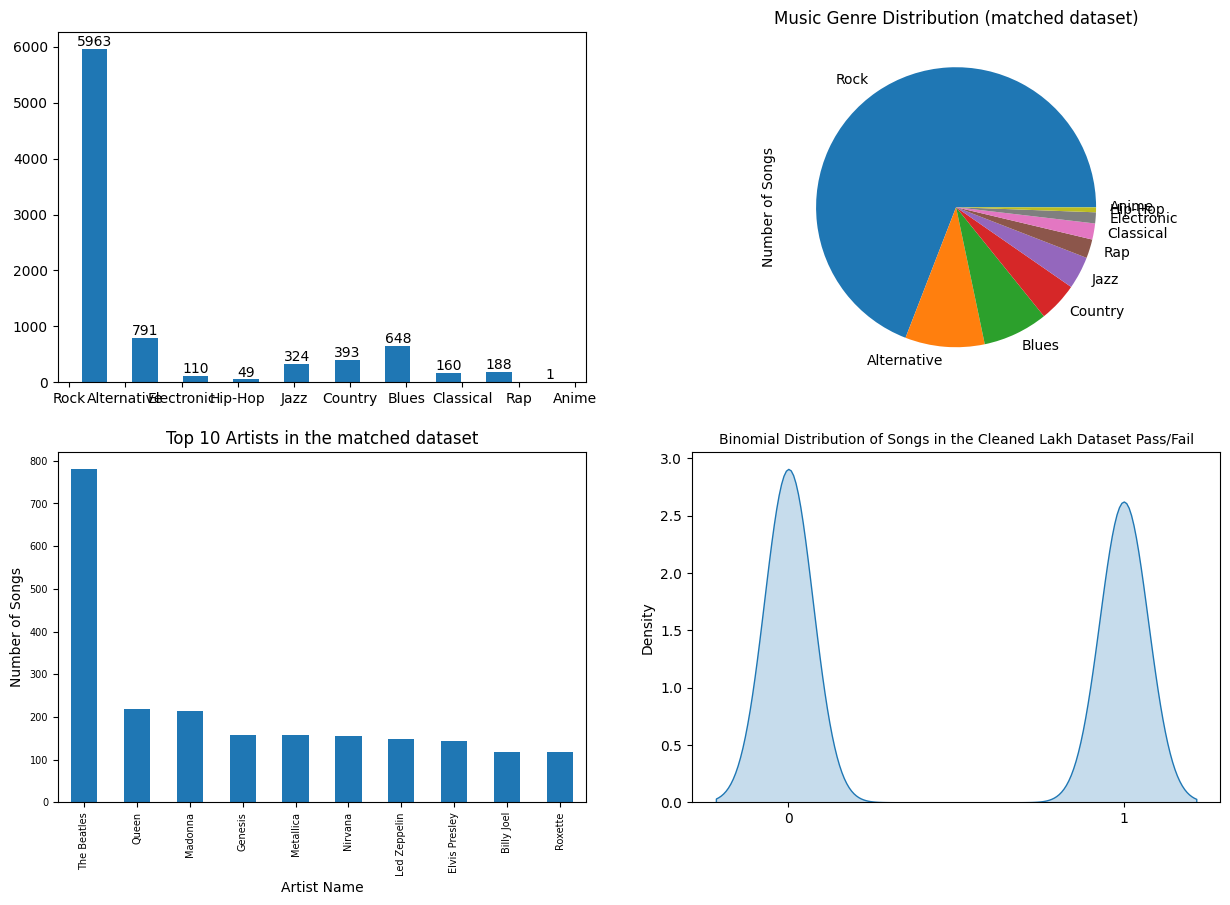

In [12]:
#Visualization with the data
#4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].hist(df_merged_cut['first_genre'], bins=10,rwidth = 0.5)
axs[0,0].bar_label(axs[0,0].containers[0])
#plot the number of songs per artist with seaborn
df_merged_cut['artist_name'].value_counts().head(10).plot(kind='bar', ax=axs[1, 0], title='Top 10 Artists in the matched dataset', ylabel='Number of Songs', xlabel='Artist Name', fontsize= 7)
#plot the number of songs per genre with seaborn in a pie chart
df_merged_cut['first_genre'].value_counts().plot(kind='pie', ax=axs[0, 1], title='Music Genre Distribution (matched dataset)', ylabel='Number of Songs', xlabel='Music Genre')
#plot the count of df_songs_paths['artist'] vs df_merged_cut['artist_name'] with seaborn in a pie chart
print(f'{int(df_merged_cut['title'].unique().shape[0]/df_song_paths['song_name'].unique().shape[0]*100)}% of the songs in the Cleaned Lakh dataset were matched with the Genre Classification dataset')

x1 = np.zeros(df_merged_cut['title'].unique().shape[0])
x2 = np.ones(df_song_paths['song_name'].unique().shape[0] - len(x1))
data = np.concatenate((x1,x2), axis = 0)
#bimodal distribution of the song landing in the cleaned lakh dataset or not with title
sns.kdeplot(data, ax=axs[1, 1], fill=True, legend=True,)
axs[1, 1].set_title('Binomial Distribution of Songs in the Cleaned Lakh Dataset Pass/Fail', fontsize= 10)
axs[1, 1].set_xticks([0,1])

# Working with the data

In [13]:
#Add full database with placeholder genre 
df_full = pd.concat((df_merged_cut,df_song_paths[df_song_paths['song_artist'].isin(df_merged_cut['songartist']) == False]))
df_full.fillna({'artist_name' : df_full['artist'], 'title' : df_full['song_name'], 'file_path': df_full['song_path'],'songartist' : df_full['song_artist'],'num_genres' : 1, 'first_genre' : 'Random', 'second_genre' : 'Random'},inplace=True)
df_full.reset_index(inplace=True)
df_full.drop(columns = ['artist','song_name','song_path','song_artist','index'],inplace= True)